In [1]:

import numpy as np
import os
import pathlib
import pandas as pd
import shutil
from pathlib import Path


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
eeg_data = np.load(f'/content/drive/My Drive/mindlock-eeg-files/session-1/for-testing/model-testing-data.npy')
eeg_labels = np.load(f'/content/drive/My Drive/mindlock-eeg-files/session-1/for-testing/model-testing-labels.npy')

In [12]:
eeg_data = np.load(f'/content/drive/My Drive/mindlock-eeg-files/session-2/for-testing/model_test_data.npy', allow_pickle=True)
eeg_labels = np.load(f'/content/drive/My Drive/mindlock-eeg-files/session-2/for-testing/model_test_labels.npy', allow_pickle=True)

In [13]:
eeg_data = eeg_data.astype('float32')

In [7]:
from tensorflow.keras.models import load_model
from sklearn.svm import SVC
import pickle

model_save_path = '/content/drive/MyDrive/mindlock-eeg-files/model/for-train-model.keras'
cnn_model = load_model(model_save_path)

svm_model_path = '/content/drive/MyDrive/mindlock-eeg-files/model/for-train-svm_model.pkl'
from joblib import load
svm_model = load(svm_model_path)

In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 251, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 251, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 125, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 125, 16)         │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 125, 16)         │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 62, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 31, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │         317,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 85)                  │           3,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007,329 (3.84 MB)

 Trainable params: 335,701 (1.28 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 671,404 (2.56 MB)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.special import softmax

# Extract features
cnn_features = cnn_model.predict(eeg_data)
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

svm_decision_scores = svm_model.decision_function(cnn_features)
probabilities = softmax(svm_decision_scores, axis=1)

svm_predictions = np.argmax(probabilities, axis=1)
confidence_scores = np.max(probabilities, axis=1) * 100

accuracy = accuracy_score(eeg_labels, svm_predictions)
precision = precision_score(eeg_labels, svm_predictions, average='macro')
recall = recall_score(eeg_labels, svm_predictions, average='macro')

print(f'Accuracy on model-testing data: {accuracy * 100:.2f}%')
print(f'Precision on model-testing data: {precision * 100:.2f}%')
print(f'Recall on model-testing data: {recall * 100:.2f}%')

for i, (pred, label, confidence) in enumerate(zip(svm_predictions, eeg_labels, confidence_scores)):
    print(f'Sample {i+1}: Prediction = {pred}, True Label = {label}, Confidence = {confidence:.2f}%')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

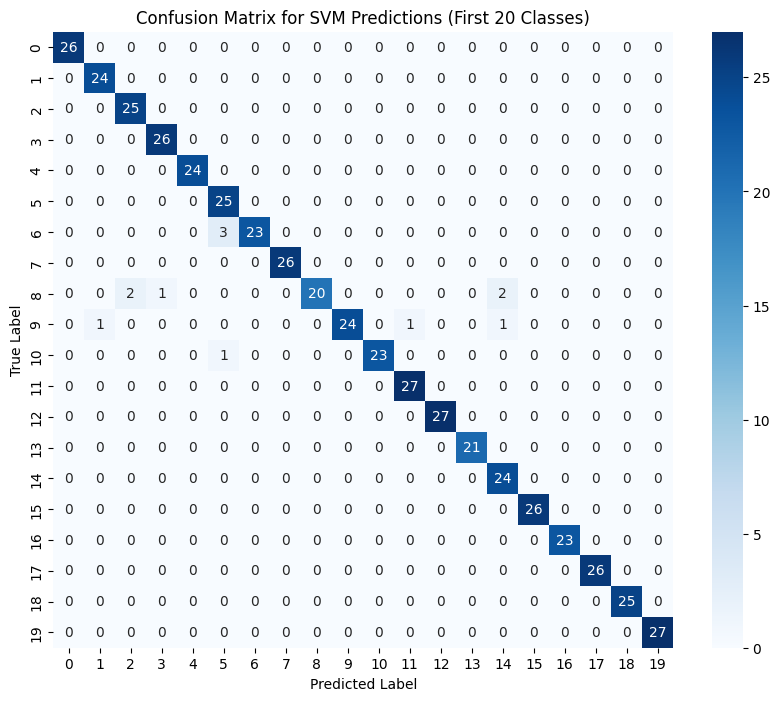

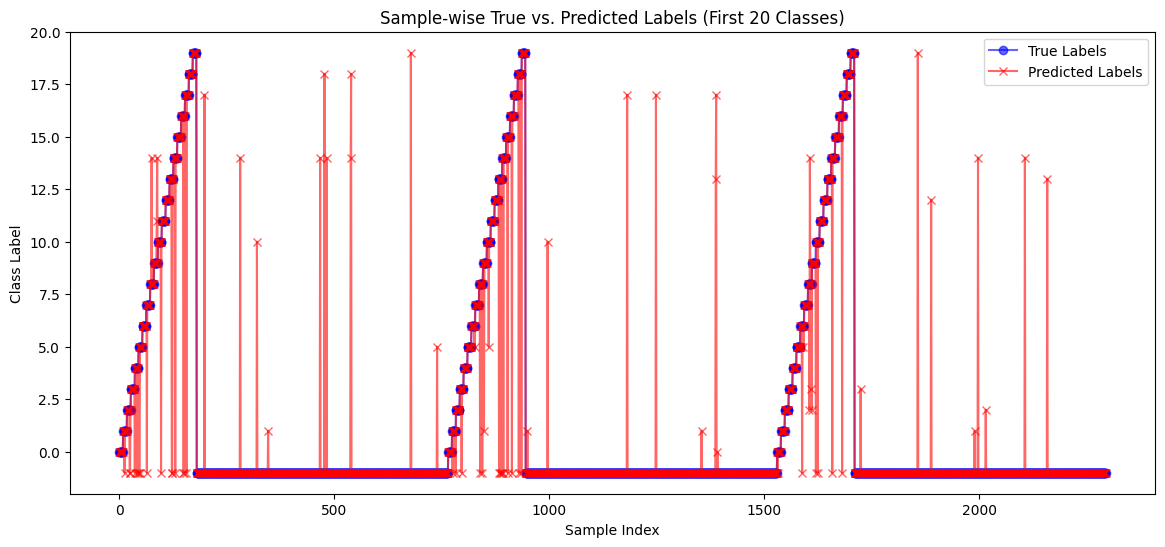

In [ ]:

#first 20 classes only
num_classes = 20
selected_classes = list(range(num_classes))
filtered_predictions = [pred if pred < num_classes else -1 for pred in svm_predictions]

# Confusion Matrix
conf_matrix = confusion_matrix(filtered_labels, filtered_predictions, labels=selected_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
plt.title("Confusion Matrix for SVM Predictions (First 20 Classes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Sample-wise Prediction Results
plt.figure(figsize=(14, 6))
plt.plot(range(len(filtered_labels)), filtered_labels, label='True Labels', color='blue', alpha=0.6, marker='o')
plt.plot(range(len(filtered_predictions)), filtered_predictions, label='Predicted Labels', color='red', alpha=0.6, marker='x')
plt.title("Sample-wise True vs. Predicted Labels (First 20 Classes)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

<ipython-input-16-5901dccfdb83>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette='Blues')


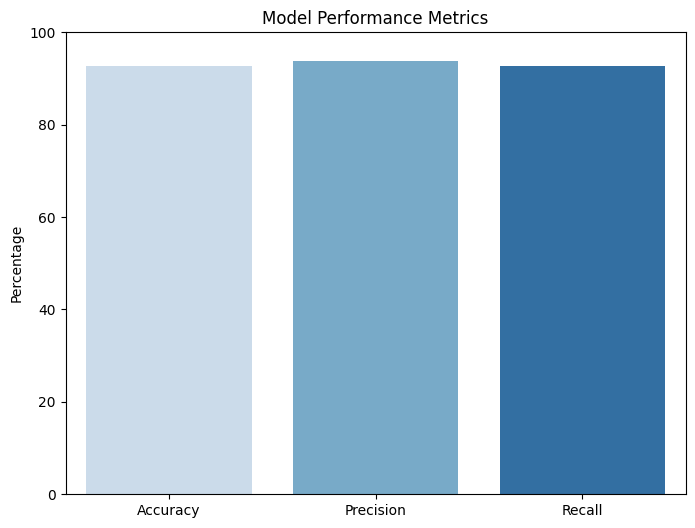

In [ ]:
metrics = [accuracy * 100, precision * 100, recall * 100]
metric_names = ['Accuracy', 'Precision', 'Recall']

plt.figure(figsize=(8, 6))
sns.barplot(x=metric_names, y=metrics, palette='Blues')
plt.title("Model Performance Metrics")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.show()